In [14]:
%load_ext autoreload 
%autoreload 2
import sys
from os import path
import glob
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
sys.path.append("..")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
path_to_test="../test_report"

# Testing Pretrained Models

## Output from test procedure

First we will aggregate the results csv obtained on each pretrained model when running `cli.py test pretrain`

In [12]:
full_results = []
for models_directory in glob.glob(path.join(path_to_test,"pretraining", "*")):
    model, task, *_ = path.basename(models_directory).split("-")
    results = pd.read_csv(path.join(models_directory, "results.csv"))
    results['model']=model
    results['task']=task
    full_results.append(results[['model', 'task','source','r2','rmse']])

full_results =pd.concat(full_results)
motion_res = full_results[full_results['task']=="MOTION"]
ssim_res = full_results[full_results['task']=="SSIM"]

### Analysis of motion results

Text(0.5, 1.0, 'Root mean squared error test results for physical motion task')

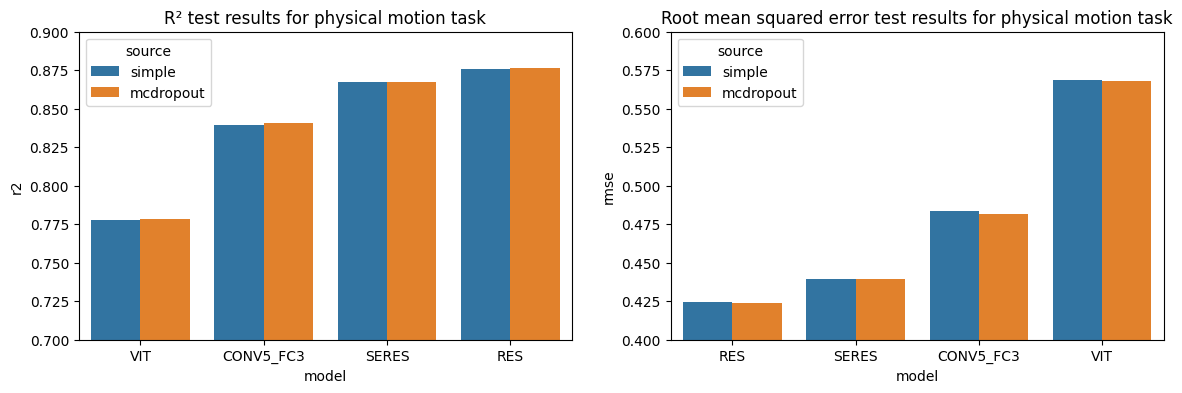

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sb.barplot(motion_res.sort_values("r2"), x="model", hue="source", y="r2", hue_order=('simple', 'mcdropout'))
plt.ylim((0.7,0.9))
plt.title("R² test results for physical motion task")


plt.subplot(1,2,2)
sb.barplot(motion_res.sort_values("rmse"), x="model", hue="source", y="rmse", hue_order=('simple', 'mcdropout'))
plt.ylim((0.4,0.6))
plt.title("Root mean squared error test results for physical motion task")


### Analysis of SSIM results

Text(0.5, 1.0, 'Root mean squared error test results for SSIM task')

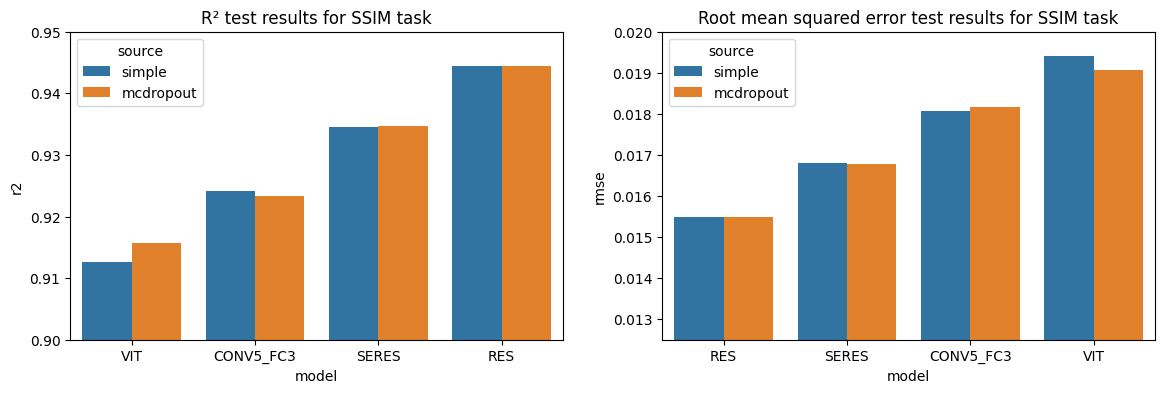

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sb.barplot(ssim_res.sort_values("r2"), x="model", hue="source", y="r2", hue_order=('simple', 'mcdropout'))
plt.ylim((0.9,0.95))
plt.title("R² test results for SSIM task")


plt.subplot(1,2,2)
sb.barplot(ssim_res.sort_values("rmse"), x="model", hue="source", y="rmse", hue_order=('simple', 'mcdropout'))
plt.ylim((0.0125,0.02))
plt.title("Root mean squared error test results for SSIM task")